In [2]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
import global_variables as gv
import utilities

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer

# Data transformation pipelines
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler,MinMaxScaler

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, PReLU
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation, Concatenate
from tensorflow.keras.optimizers  import Adam, Adagrad, SGD
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [4]:
# Importing from Scikit-Learn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis

from keras.layers import Input, Embedding, Reshape, GlobalAveragePooling1D
from keras.layers import Flatten, concatenate, Concatenate, Lambda, Dropout, SpatialDropout1D
from keras.layers import Activation, LeakyReLU
from keras.models import Model, load_model
from keras.losses import binary_crossentropy

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [5]:
df = pd.read_csv(gv.data_link)
pd.set_option('display.max_columns', None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,1418-0.0,1329-0.0,1220-0.0,1428-0.0,1249-0.0,1349-0.0,1369-0.0,20117-0.0,2100-0.0,2654-0.0,1339-0.0,21000-0.0,2050-0.0,1408-0.0,1200-0.0,1538-0.0,31-0.0,6138-0.0,1359-0.0,1389-0.0,1478-0.0,2090-0.0,1508-0.0,1379-0.0,6142-0.0,1468-0.0,1548-0.0,1239-0.0,1448-0.0,hypertension,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_myocardial_infarction,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,multi-labels,age,gender,race
0,0.50800,3.88800,6.47700,65.1984,45.2,35.6,74.0,25.0,0.34,1.70600,1.21100,35.065,102.0,26.339,5.62200,1.59300,0.97700,24.5790,6.0,77.0,10.0,54.0,7.0,10.0,110.0,3.73,2.0,0.0,23.52,6.0,2.0,3,2,0,0,1,1,1,2,1,6,2,0,2,1,3,2,0,1,2,1,1,1,3,1,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",54,Female,British
1,13.08800,3.52000,5.51200,15.4000,74.6,36.5,120.0,42.9,3.94,1.17300,1.01900,40.900,113.0,10.701,5.05200,1.39000,2.35800,35.0861,2.0,91.0,2.0,65.0,9.0,12.0,166.0,7.00,2.4,0.0,16.00,2.0,1.0,2,2,0,1,1,4,2,2,0,7,2,0,1,3,2,0,1,3,3,1,1,0,2,2,1,5,2,0,1,1,0,1,0,1,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0]",65,Male,British
2,9.73364,4.10892,6.47949,50.8588,71.7,29.7,112.0,30.3,3.88,1.58546,1.22432,84.100,107.0,18.763,13.71763,1.74423,2.78764,30.7934,0.0,99.0,2.0,55.0,7.0,10.0,135.0,7.00,2.0,0.0,21.00,3.0,1.0,2,1,0,0,1,2,1,2,0,7,2,0,1,2,2,1,1,3,3,2,1,0,2,2,1,4,2,0,3,1,0,1,0,0,0,1,1,1,"[0, 0, 1, 0, 0, 1, 1, 1]",55,Male,British
3,1.78800,2.88700,5.56500,56.5183,40.2,29.8,67.0,17.0,0.87,2.11500,0.81000,36.400,91.0,31.672,4.82700,1.89100,1.15700,20.7577,0.0,71.0,5.0,49.0,8.0,14.0,116.0,5.00,3.0,1.0,18.00,5.0,1.0,2,2,0,0,4,1,2,2,0,7,2,2,1,2,1,2,0,6,2,2,1,0,2,2,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",49,Female,Irish
4,0.75600,2.67000,4.68000,4.7700,46.5,30.1,85.0,20.0,0.18,1.49300,0.73300,34.200,105.0,42.209,5.06300,1.86900,1.67700,25.9766,7.0,73.0,4.0,61.0,7.0,2.0,113.0,7.00,4.0,2.0,16.00,3.0,3.0,3,2,1,1,4,1,1,2,0,7,3,0,1,3,1,0,0,3,3,1,2,0,1,1,1,4,2,0,3,1,0,0,0,1,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]",61,Female,British


### Build MLP Model

In [ ]:
# METRICS = [
#       keras.metrics.TruePositives(name='tp'),
#       keras.metrics.FalsePositives(name='fp'),
#       keras.metrics.TrueNegatives(name='tn'),
#       keras.metrics.FalseNegatives(name='fn'), 
#       keras.metrics.BinaryAccuracy(name='accuracy'),
#       keras.metrics.Precision(name='precision'),
#       keras.metrics.Recall(name='recall'),
#       keras.metrics.AUC(name='auc'),
#       keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
# ]

#### optimize number of nodes

In [ ]:
def evaluate_nodes(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    model.add(Dense(100, activation=tf.keras.activations.gelu , input_shape=(X_train.shape[1],)))
    model.add(Dense(n_nodes, activation=tf.keras.activations.gelu ))
    model.add(Dense(n_nodes, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',utilities.f1_m,utilities.precision_m, utilities.recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
def evaluate_layers(n_layers, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    model.add(Dense(100, activation=tf.keras.activations.gelu , input_shape=(X_train.shape[1],)))
    for _ in range(1,n_layers):
        model.add(Dense(50, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',utilities.f1_m,utilities.precision_m, utilities.recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

#### test range of input nodes

In [ ]:
num_nodes = [10, 25, 50, 100, 150, 200]
epochs = 400
batch = 500

X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
X_train, y_train= utilities.resample_data(X_train, y_train, 'under')

save_history = pd.DataFrame()
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_nodes(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle('Number of Nodes: '+str(n_nodes))

Epoch 1/400
112/112 [==============================] - 6s 19ms/step - loss: 0.6965 - acc: 0.4980 - f1_m: 0.6397 - precision_m: 0.4984 - recall_m: 0.8942 - val_loss: 0.6936 - val_acc: 0.5160 - val_f1_m: 0.6580 - val_precision_m: 0.5241 - val_recall_m: 0.8849
Epoch 2/400
112/112 [==============================] - 1s 11ms/step - loss: 0.6962 - acc: 0.4972 - f1_m: 0.6369 - precision_m: 0.4984 - recall_m: 0.8832 - val_loss: 0.6935 - val_acc: 0.5150 - val_f1_m: 0.6548 - val_precision_m: 0.5239 - val_recall_m: 0.8742
Epoch 3/400
112/112 [==============================] - 1s 11ms/step - loss: 0.6961 - acc: 0.4974 - f1_m: 0.6341 - precision_m: 0.4988 - recall_m: 0.8715 - val_loss: 0.6935 - val_acc: 0.5142 - val_f1_m: 0.6514 - val_precision_m: 0.5237 - val_recall_m: 0.8625
Epoch 4/400
112/112 [==============================] - 1s 11ms/step - loss: 0.6959 - acc: 0.4969 - f1_m: 0.6308 - precision_m: 0.4987 - recall_m: 0.8594 - val_loss: 0.6934 - val_acc: 0.5145 - val_f1_m: 0.6489 - val_precision_m

KeyboardInterrupt: 

In [6]:
def plot_compare(data, metric):
  labels = []
  for i in range(data.shape[1]):
    sns.lineplot(x=data.index, y=data.loc[:,data.columns[i-1]], data=data)
    plt.title(metric+' for all num_nodes')
    labels.append(str(data.columns[i-1]))
  plt.legend(title=metric, loc='best', labels=labels)


In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[::4]], 'loss')

In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[1::4]], 'accuracy')

In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[2::4]], 'F1-Score')

In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
num_layers = [3, 4, 5]
epochs = 400
batch = 500

X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
X_train, y_train= utilities.resample_data(X_train, y_train, 'under')

save_history = pd.DataFrame()
for n_layers in num_layers:
    # evaluate model with a given number of nodes
    history, result = evaluate_layers(n_layers, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch)
    save_history['loss_'+str(n_layers)]=history.history["loss"]
    save_history['acc_'+str(n_layers)]=history.history["acc"]
    save_history['f1'+str(n_layers)]=history.history["f1_m"]
    save_history['recall'+str(n_layers)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_layers, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle('Number of Layers: '+str(n_layers))

### Build Model after testing

In [10]:
def mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.000001):
    
    # define model
    model = Sequential()
    model.add(Dense(1000, activation=activation , input_shape=(X_train.shape[1],)))
    model.add(Dense(500, activation=activation))
    model.add(Dense(500, activation=activation ))
    model.add(Dense(200, activation=activation ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=opt(learning_rate=lr),
        metrics=['acc',utilities.f1_m,utilities.precision_m, utilities.recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [8]:
epochs =300
batch = 400
sample_methods =['ADASYN', 'over', 'under', 'partial_under']
activations=['relu', 'tanh', tf.keras.activations.gelu]
optimizers = [SGD, Adam, Adagrad]
num_transformers = [StandardScaler(), MinMaxScaler(), QuantileTransformer(output_distribution='uniform')]
# test one_hot==True/False

Epoch 1/300
78/78 [==============================] - 3s 18ms/step - loss: 0.7042 - acc: 0.5281 - f1_m: 0.5853 - precision_m: 0.5245 - recall_m: 0.6759 - val_loss: 0.6970 - val_acc: 0.5423 - val_f1_m: 0.3747 - val_precision_m: 0.2874 - val_recall_m: 0.5404
Epoch 2/300
78/78 [==============================] - 1s 14ms/step - loss: 0.6878 - acc: 0.5579 - f1_m: 0.5599 - precision_m: 0.5575 - recall_m: 0.5637 - val_loss: 0.6840 - val_acc: 0.5710 - val_f1_m: 0.3996 - val_precision_m: 0.3108 - val_recall_m: 0.5622
Epoch 3/300
78/78 [==============================] - 1s 13ms/step - loss: 0.6792 - acc: 0.5726 - f1_m: 0.5704 - precision_m: 0.5733 - recall_m: 0.5687 - val_loss: 0.6784 - val_acc: 0.5785 - val_f1_m: 0.4139 - val_precision_m: 0.3206 - val_recall_m: 0.5864
Epoch 4/300
78/78 [==============================] - 1s 13ms/step - loss: 0.6731 - acc: 0.5845 - f1_m: 0.5846 - precision_m: 0.5848 - recall_m: 0.5855 - val_loss: 0.6718 - val_acc: 0.5873 - val_f1_m: 0.4225 - val_precision_m: 0.3283

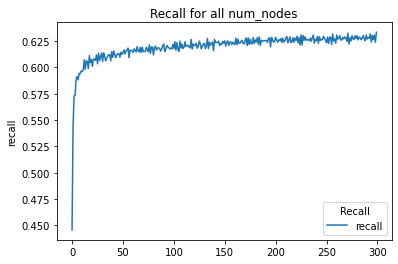

In [12]:
# Run all outcomes
save_history = pd.DataFrame()
for param in gv.outcomes:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, param, StandardScaler(), one_hot=True)
    X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=Adam, lr=0.000001)
    save_history['loss_']=history.history["loss"]
    save_history['acc_']=history.history["acc"]
    save_history['f1']=history.history["f1_m"]
    save_history['recall']=history.history["recall_m"]

    # summarize final test set accuracy
    print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    # utilities.plot_history(history)
    # plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
# Test numerical transformers
save_history = pd.DataFrame()
for param in num_transformers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia', param, one_hot=True)
    X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
# Test sample methods
save_history = pd.DataFrame()
for param in sample_methods:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia')
    X_train, y_train= utilities.resample_data(X_train, y_train, param)
    
    # evaluate model with a given number of nodes
    history, result = mlp_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch,opt=SGD, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
# Test activations
activations = ['tanh']
save_history = pd.DataFrame()
for param in activations:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia')
    X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = mlp_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation=param,opt=SGD, lr=0.0001) #lr = 0.0002
    save_history['loss_']=history.history["loss"]
    save_history['acc_']=history.history["acc"]
    save_history['f1']=history.history["f1_m"]
    save_history['recall']=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
# Test optimizers

optimizers =[Adam]
save_history = pd.DataFrame()
for param in optimizers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia')
    X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = mlp_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=param, lr=0.000002)
    save_history['loss_']=history.history["loss"]
    save_history['acc_']=history.history["acc"]
    save_history['f1']=history.history["f1_m"]
    save_history['recall']=history.history["recall_m"]


    # summarize final test set accuracy
    print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))


In [ ]:
result

#### Learning Rate

In [ ]:
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
# LR range-test

In [ ]:
# Test opt opt params

learning_rates = [1e-3, 1e-4, 1e-6, some_changing_thing()]
beta1, beta2 = [1,2,3,4], [1,2,3,4]
save_history = pd.DataFrame()
for param in optimizers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
    X_train, y_train= resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = basic_model(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='relu',opt=param, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

### Build MLP Model with Embeddings

In [ ]:
def build_categorical_inputs(features):

    initial_inputs = {}
    cat_input_layers={}
    
    train_test_cat_features = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])
    
    for feature in features:
        no_of_unique_cats  = train_test_cat_features[feature].nunique()
        embedding_size = int(min(np.ceil((no_of_unique_cats)/2), 50))
        categories  = no_of_unique_cats + 1

        initial_inputs[feature] = Input(shape=(1,))
        embedding_layer = Embedding(categories, 
                                    embedding_size,
                                    embeddings_regularizer=regularizers.l2(0.01),
                                    input_length=1)(initial_inputs[feature])
        cat_input_layers[feature] = Reshape(target_shape=(embedding_size,))(embedding_layer)

    return initial_inputs, cat_input_layers

In [ ]:
def build_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    models = []
    for categorical_var in categorical_cols :
        model = Sequential()
        no_of_unique_cat  = X_train[categorical_var].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
        embedding_size = int(embedding_size)
        vocab  = no_of_unique_cat+1
        model.add( Embedding(vocab ,embedding_size, input_length = 1 ))
        model.add(Reshape(target_shape=(embedding_size,)))
        models.append( model )
        
    model_rest = Sequential()
    model_rest.add(Dense(16, input_dim= X_train[numerical_cols+continuous_cols].shape[1]))
    models.append(model_rest)

    full_model = Sequential()
    full_model.add(Concatenate(models))
    full_model.add(Dense(1000))
    full_model.add(Activation('relu'))
    full_model.add(Dense(400))
    full_model.add(Activation('relu'))
    full_model.add(Dense(1))
    full_model.add(Activation('sigmoid'))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
def build_model( X_train, X_val, X_test ,y_train, y_val, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    for col in categorical_cols:
        no_of_unique_cat  = X_train[col].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50)
        embedding_size = int(embedding_size)
        vocab  = no_of_unique_cat+1
        model.add(Embedding(input_dim=no_of_unique_cat, output_dim=embedding_size, input_shape=(X_train.shape[1],)))
    model.add(Flatten())

    model.add(Dense(50, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=False)
X_train, y_train= resample_data(X_train, y_train, 'under')
model=build_model(X_train, X_val, X_test ,y_train, y_val, y_test, 400, 600)

In [ ]:
initial_inputs, input_layers = build_categorical_inputs(categorical_cols)

no_of_num_features = len(X_train.columns) - len(categorical_cols)

initial_inputs['numerical_features'] = Input(shape=(no_of_num_features,))
input_layers['numerical_features'] = initial_inputs['numerical_features']

inputs = Concatenate(axis=-1)([layer for layer in input_layers.values()])

In [ ]:
models = []

model_rest = Sequential()
model_rest.add(Dense(100, input_dim= len(numerical_cols+continuous_cols) ))
models.append(model_rest)

for categorical_var in categorical_cols :
     
    model = Sequential()
    no_of_unique_cat  = X_train[categorical_var].nunique()
    
    # jeremy howard rule
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    vocab  = no_of_unique_cat+1
    model.add( Embedding(vocab ,embedding_size, input_length = 1 ))
    model.add(Reshape(target_shape=(embedding_size,)))
    models.append( model )


    full_model = Sequential()
    full_model.add(Concatenate(models))
    full_model.add(Dense(1000))
    full_model.add(Activation('relu'))
    full_model.add(Dense(400))
    full_model.add(Activation('relu'))
    full_model.add(Dense(200))
    full_model.add(Activation('sigmoid'))
    full_model.add(Dense(1))
    full_model.add(Activation('sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
batch=1000
epochs=100
# fit model on train set
history = model.fit(
    X_train, y_train,
    batch_size=batch,
    epochs=epochs,
#     shuffle=True,
    verbose=1,
    validation_data=(X_val, y_val),
)
score = model.evaluate(X_test, y_test, verbose=0)

### K-fold cross validation

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    full_model = Sequential()
    full_model.add(Concatenate(models))
    full_model.add(Dense(1000))
    full_model.add(Activation('relu'))
    full_model.add(Dense(400))
    full_model.add(Activation('relu'))
    full_model.add(Dense(200))
    full_model.add(Activation('sigmoid'))
    full_model.add(Dense(1))
    full_model.add(Activation('sigmoid'))

    # Compile the model
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

### Save Model

In [ ]:
Model.save(
    saved_models/'model_'+str(num)+'.h5',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)